In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('C:/Users/WIN11/kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


<Axes: xlabel='Kyphosis'>

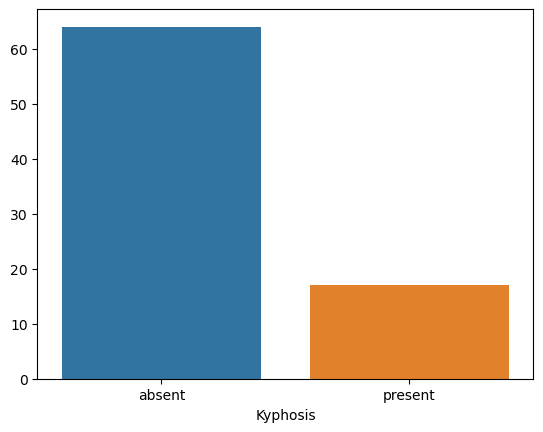

In [5]:
vc= df['Kyphosis'].value_counts()
sns.barplot(x= vc.index, y= vc.values)

In [6]:
x = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

x_np= x.to_numpy()
y_np = y.to_numpy()
import sys
print(sys.getsizeof(x))
print(sys.getsizeof(x_np))
print(sys.getsizeof(y))
print(sys.getsizeof(y_np))

y = y.apply(lambda x: 1 if x == 'present' else 0)
y_np= np.where(y_np == 'present',1,0)

2108
128
5284
112


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify = y)
x_train_np, x_test_np, y_train_np, y_test_np = train_test_split(x_np,y_np,test_size=0.3, stratify = y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train_np.shape, x_test_np.shape, y_train_np.shape , y_test_np.shape)
print(type(x_train), type(x_train_np))

(56, 3) (25, 3) (56,) (25,)
(56, 3) (25, 3) (56,) (25,)
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


<Axes: xlabel='Kyphosis'>

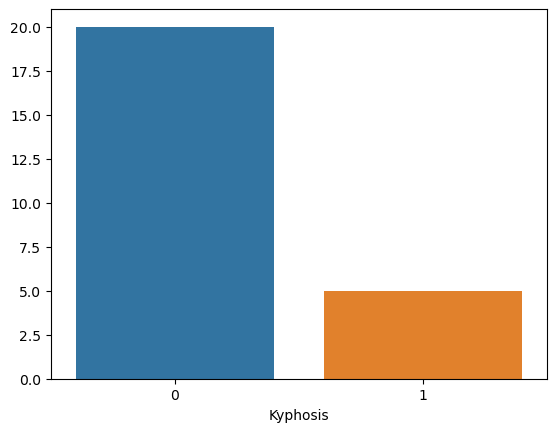

In [8]:
vc= y_test.value_counts()
sns.barplot(x= vc.index, y=vc.values)

In [9]:
from timeit import default_timer as timer

start = timer()
lr = LogisticRegression(multi_class= 'ovr')
lr.fit(x_train, y_train)
lr.predict(x_test)
print(timer() - start)

0.018519300036132336


In [10]:
start = timer()
lr= LogisticRegression()
lr.fit(x_train_np, y_train_np)
ans= lr.predict(x_test_np)
ans_p= lr.predict_proba(x_test_np)
print(timer() - start)

0.005908300052396953


In [11]:
for i,j in enumerate(ans == y_test_np):
    if not j:
        print(ans[i])

0
0
1
0
1
0


In [12]:
accuracy_score(ans, y_test_np)

0.76

In [13]:
min_max_scaler= MinMaxScaler()
standard_scaler= StandardScaler()

min_max_scaler.fit(x_train_np)
x_train_np_mm= min_max_scaler.transform(x_train_np)
x_test_np_mm = min_max_scaler.transform(x_test_np)

In [14]:
start = timer()
lr.fit(x_train_np_mm, y_train_np)
accuracy_score(lr.predict(x_test_np_mm),y_test_np)
print(timer() - start)

0.005777200101874769


In [15]:
standard_scaler.fit(x_train_np)
x_train_np_std = standard_scaler.transform(x_train_np)
x_test_np_std = standard_scaler.transform(x_test_np)

start = timer()
lr.fit(x_train_np_std, y_train_np)
accuracy_score(lr.predict(x_test_np_std),y_test_np) 
print(timer() - start)

0.0036680999910458922


C:\Users\WIN11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WIN11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


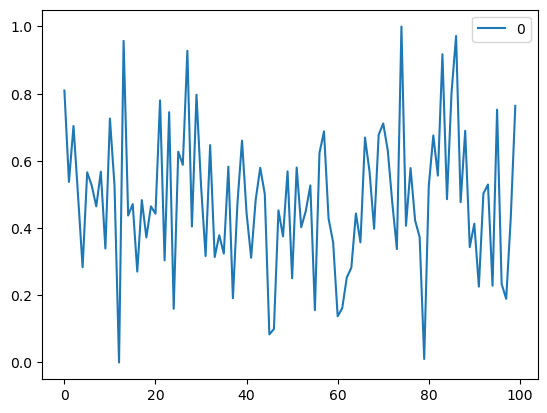

C:\Users\WIN11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WIN11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


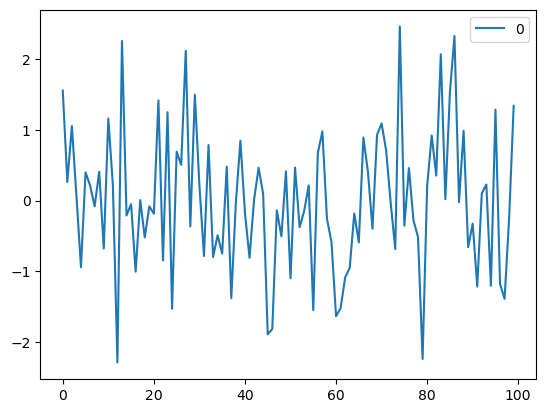

C:\Users\WIN11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WIN11\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


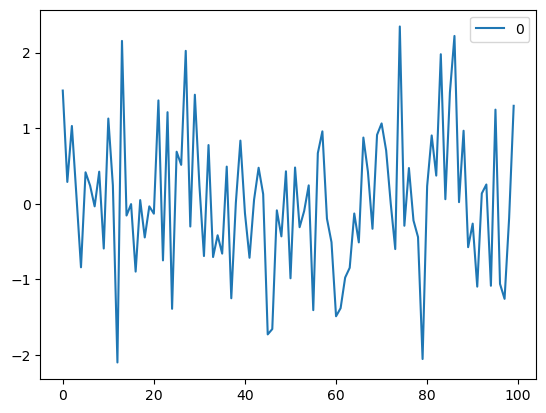

In [16]:
import matplotlib.pyplot as plt

arr= np.random.randn(100,1)
mm_scaler= MinMaxScaler()
std_scaler= StandardScaler()

mms_arr= mm_scaler.fit_transform(arr)
std_arr= std_scaler.fit_transform(arr)

sns.lineplot(mms_arr)
plt.show()
sns.lineplot(std_arr)
plt.show()
sns.lineplot(arr)
plt.show()

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train_np_mm, y_train)
accuracy_score(gnb.predict(x_test_np_mm), y_test_np)

0.8

In [18]:
print(lr.coef_)

[[ 0.0722456   0.64597585 -0.89649317]]


In [19]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", gamma=0.2, C=1.0)
svm.fit(x_train_np_mm, y_train)
accuracy_score(svm.predict(x_test_np_mm), y_test_np)

0.8

0.84


[Text(0.5333333333333333, 0.9, 'x[0] <= 0.685\ngini = 0.337\nsamples = 56\nvalue = [44, 12]'),
 Text(0.3333333333333333, 0.7, 'x[1] <= 0.188\ngini = 0.269\nsamples = 50\nvalue = [42, 8]'),
 Text(0.13333333333333333, 0.5, 'x[2] <= 0.969\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.06666666666666667, 0.3, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.2, 0.3, 'x[0] <= 0.149\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.13333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5333333333333333, 0.5, 'x[0] <= 0.622\ngini = 0.366\nsamples = 29\nvalue = [22, 7]'),
 Text(0.4666666666666667, 0.3, 'x[0] <= 0.495\ngini = 0.413\nsamples = 24\nvalue = [17, 7]'),
 Text(0.4, 0.1, 'gini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(0.5333333333333333, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.7333333333333333

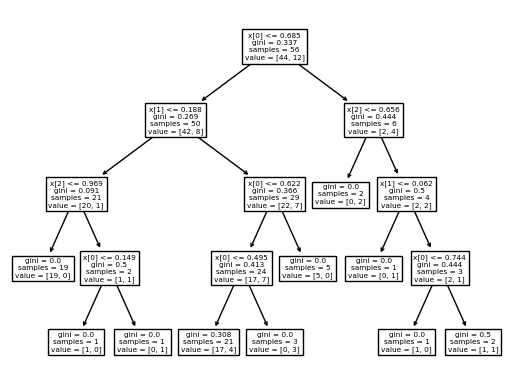

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc= DecisionTreeClassifier(max_depth = 4, criterion='gini')
dtc.fit(x_train_np_mm, y_train)
print(accuracy_score(dtc.predict(x_test_np_mm), y_test_np))
tree.plot_tree(dtc)

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(max_depth = 5, n_estimators= 10)
rfc.fit(x_train_np_mm, y_train_np)
print(accuracy_score(rfc.predict(x_test_np_mm), y_test_np))

0.88


In [22]:
forest_params = [{'max_depth': list(range(2,12)), 'n_estimators':[10,50,100,150,200]}]
model_cv = GridSearchCV(rfc, forest_params, cv= 10, scoring='accuracy')

model_cv.fit(x_train_np_mm, y_train_np)
print(accuracy_score(model_cv.predict(x_test_np_mm), y_test_np))

0.84


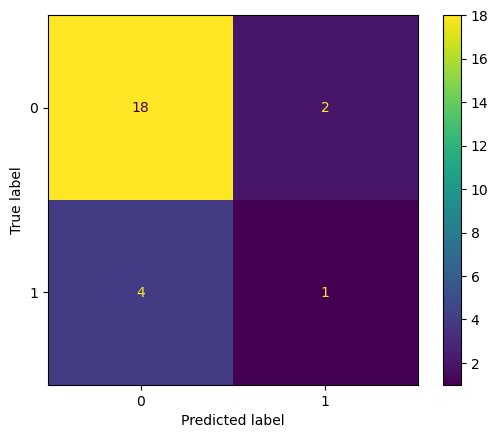

In [23]:
cm = confusion_matrix(y_test_np,ans)
disp= ConfusionMatrixDisplay(cm)
disp.plot()

In [24]:
ans_p[:,0]

array([0.86191593, 0.93666468, 0.95253245, 0.65742235, 0.92260672,
       0.68700314, 0.96916587, 0.35098456, 0.97998224, 0.91767995,
       0.8623944 , 0.60169746, 0.93291593, 0.39355079, 0.86274373,
       0.41463687, 0.91879691, 0.97324448, 0.92511333, 0.96422224,
       0.65074597, 0.95898245, 0.9321966 , 0.84204592, 0.80301442])